# Relax Inc. Take Home Challenge

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [179]:
df = pd.read_csv('takehome_user_engagement.csv')
df[df.user_id == 2]

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1
10,2014-02-13 03:45:04,2,1


In [180]:
# identify customers who have logged in at least 3 times in any 7 day period

df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y/%m/%d')
print(max(df.time_stamp))
df['time_stamp'] = df['time_stamp'].dt.floor('d').astype(np.int64)
#sorting and remove duplicated days per users 
df = df.sort_values(['user_id', 'time_stamp']).drop_duplicates()

# group by user and time stamp
a = df.groupby('user_id')['time_stamp'].rolling(window=3)
# create the time delta variable
b = pd.to_timedelta((a.max()- a.min())).dt.days
# set window to 7 days and get list of adopted users
c = b[b == 7].index.get_level_values('user_id').tolist()
# convert list to a set to only keep user id once
adopted_users = set(c)

2014-06-06 14:58:50


In [181]:
# print how many adopted users there are
print('There are',len(adopted_users),'adopted users')

There are 1358 adopted users


In [182]:
# import user info data
dfu = pd.read_csv('takehome_users.csv', encoding='latin-1', index_col=0)

In [183]:
# fill NaN values with 0s
dfu.last_session_creation_time.fillna(0, inplace = True)
dfu.invited_by_user_id.fillna(0, inplace = True)
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  12000 non-null  float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [184]:
# Dummy/OneHot Encode creation source column
dfo = pd.DataFrame(dfu.creation_source)
dfu = pd.concat([dfu.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
dfu

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,1,0,0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,0,1,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,1,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,1,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,1.378448e+09,0,0,89,8263.0,0,1,0,0,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,1.358275e+09,0,0,200,0.0,0,0,0,0,1
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,1.398603e+09,1,1,83,8074.0,1,0,0,0,0


In [185]:
# add label column of adopted user or not
dfu['adopted_user'] = [1 if x in adopted_users else 0 for x in dfu.index]
# add a column for whether the user was referred or now
dfu['referred?'] = [1 if x > 0 else 0 for x in dfu.invited_by_user_id]
dfu.adopted_user.value_counts()

0    10642
1     1358
Name: adopted_user, dtype: int64

# EDA

In [199]:
fig_save_path = "/Users/joeboardman/Documents/Springboard/GitHub/Springboard/Unit_26.2_RelaxInc_TakeHomeChallenge/"

In [186]:
# create column to indicate whether a user has logged in in the last month
dfu['last_login'] = [datetime.fromtimestamp(x) for x in dfu.last_session_creation_time]
month_ago = datetime(2014, 5, 6) 
dfu['recent_login'] = [1 if x > month_ago else 0 for x in dfu.last_login]
dfu.recent_login.value_counts()

0    9984
1    2016
Name: recent_login, dtype: int64

In [164]:
# formula to upsample columns
from sklearn.utils import resample

def upsample(df, labels, df_majority, minority_classes):
    '''upsample minority classes to match majority class
    df: data set (DataFrame)
    labels: df column with our response variable (String)
    df_majority: majority class in dataframe that we are upsampling to (Series)
    minority_classes: minority classes in dataframe that we want to upsample (List)'''
    
    df_upsampled = df_majority
    
    for min_class in minority_classes:
        df_min_class = resample(df[df[labels] == min_class], replace=True, n_samples=len(df_majority), 
                                random_state=42)
        
        df_upsampled = pd.concat([df_upsampled, df_min_class])
        
    return df_upsampled

In [165]:
# upsample minority columns so that we have balanced classes
minority_classes = [1]

dfu = upsample(dfu, 'adopted_user', dfu[dfu.adopted_user==0], minority_classes)
dfu.adopted_user.value_counts()

1    10642
0    10642
Name: adopted_user, dtype: int64

In [191]:
# split train and test set

X = dfu.drop(['adopted_user', 'creation_time', 'name', 'email', 'last_session_creation_time', 'org_id', 
              'invited_by_user_id', 'last_login'], axis=1) #, 'last_login'
y = dfu.adopted_user

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

X_test

,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,referred?,recent_login
object_id,,,,,,,,,
5256,1,0,0,1,0,0,0,1,0
3715,0,0,0,1,0,0,0,1,0
1611,0,0,0,0,0,0,1,0,0
10397,0,0,1,0,0,0,0,1,1
5868,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
3190,0,0,0,0,0,0,1,0,0
3816,1,0,0,0,0,1,0,0,0
5406,0,0,0,1,0,0,0,1,0


In [188]:
# gridsearch on random forest 

t0 = time()

max_depth = [5, 15, 30, 50, 100]
max_depth.append(None)
criterion = ('gini', 'entropy')
max_features = ('auto', 'sqrt')
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 2, 4, 7, 10]

param_grid = {
    'max_depth':max_depth,
    'criterion':criterion,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

rf = RandomForestClassifier(random_state=34)

gs = GridSearchCV(rf, param_grid=param_grid, cv=3, verbose=2, n_jobs = -1)

gs.fit(X_train, y_train)

print('Runtime:', round((time() - t0) / 60,1), 'minutes')

print(gs.best_params_)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [192]:
# Random forest classifier model to predict adoption
rf = RandomForestClassifier(random_state=34)
#rf = RandomForestClassifier(criterion='gini', max_depth=5, max_features='auto', min_samples_leaf=1, 
#                            min_samples_split=2, random_state=34)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2643
           1       0.55      0.71      0.62       357

    accuracy                           0.90      3000
   macro avg       0.75      0.82      0.78      3000
weighted avg       0.91      0.90      0.90      3000



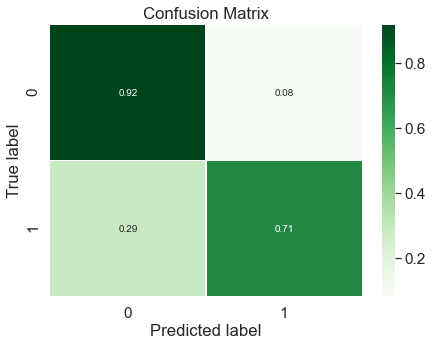

In [206]:
#create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
fig = plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
fig = sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

fig.figure.savefig(fig_save_path + 'rf_Predictions.png')

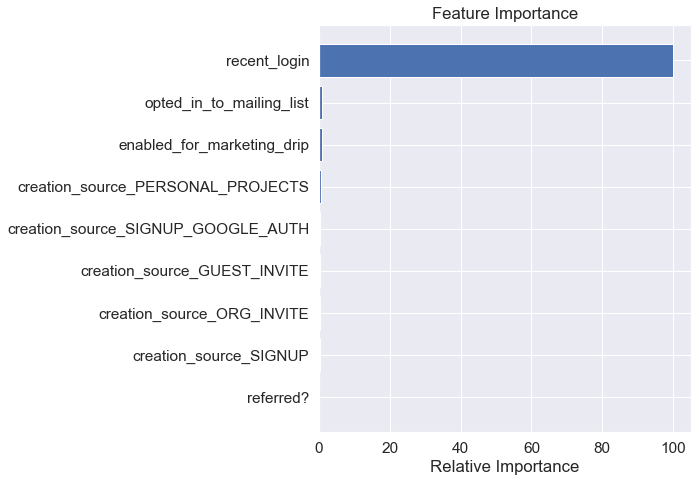

In [211]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,7))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(fig_save_path + 'feat_importance.png')
plt.show()

